In [2]:
import numpy as np
import matplotlib.pyplot as plt
from worldModels import *
import scipy.io

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
nblocks = 100

prewlist = np.linspace(0.5, 0.95, 12)
pswitchlistLog = np.linspace(np.log(0.01), np.log(0.2), 10)
pswitchlist = np.exp(pswitchlistLog)
efflist = np.zeros((len(prewlist), len(pswitchlist)))

for i, prew in enumerate(prewlist):
    print(i)
    for j, pswitch in enumerate(pswitchlist):
        #print(i, j)
        raw_rates = np.random.rand(nblocks)
        rates = np.vstack((1-raw_rates, raw_rates)).T
        ntrials = np.random.uniform(low=200, high=300, size=nblocks).astype('int')

        world = PersistentWorld(rates=rates, ntrials=ntrials)

        agent = InferenceBasedAgent(prew=prew, pswitch=pswitch, type='random')

        exp = Experiment(agent, world)
        a,b = exp.run()  
        efflist[i,j] = agent.find_efficiency()


0
1
2
3
4
5
6
7
8
9
10
11


Text(0, 0.5, '$P_{reward}$')

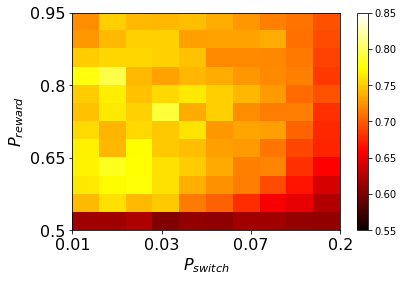

In [100]:
fig, ax = plt.subplots()
im = ax.imshow(efflist, extent=[min(pswitchlistLog), max(pswitchlistLog), min(prewlist), max(prewlist)],
          origin='lower', cmap='hot', vmin=0.55, vmax=0.85, aspect='auto')
fig.colorbar(im)

fontdict = {'fontsize': 16,
 'fontweight': 2}
ax.set_xticks(pswitchlistLog[::3])
ax.set_xticklabels(np.round(pswitchlist[::3], 2), fontdict)
ax.set_yticks(np.linspace(min(prewlist), max(prewlist), 4))
ax.set_yticklabels(np.linspace(min(prewlist), max(prewlist), 4), fontdict)

plt.xlabel(r'$P_{switch}$', fontdict)
plt.ylabel(r'$P_{reward}$', fontdict)




In [221]:
nblocks = 100
prew = 0.65
pswitch = 0.02
np.random.seed(100)
raw_rates = np.random.rand(nblocks)
rates = np.vstack((1-raw_rates, raw_rates)).T
ntrials = np.random.uniform(low=200, high=300, size=nblocks).astype('int')

world = PersistentWorld(rates=rates, ntrials=ntrials)

agent = InferenceBasedAgent(prew=prew, pswitch=pswitch, type='random')

exp = Experiment(agent, world)
res = exp.run()

In [222]:
agent.find_efficiency()

0.7660462896683369

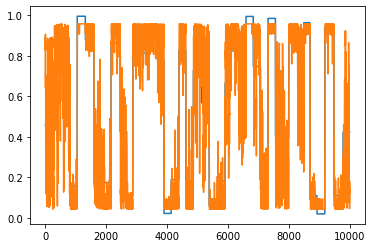

In [203]:
rate_history = world.get_rate_history()
nsteps = 10000
plt.plot(rate_history[:nsteps, 0])
plt.plot(agent.p0_history[:nsteps])

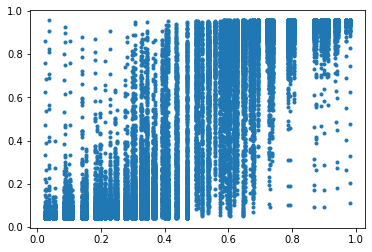

In [159]:
plt.plot(rate_history[:,0], agent.p0_history, '.')

In [206]:
agent.Rewards1side_history

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,


In [223]:
a = agent.get_running_choice_fraction(10)
b = agent.get_running_reward_fraction(10)
rates_hist = world.get_rate_history()

In [240]:
ntrialcum = np.cumsum(ntrials)
ntrialcum = np.hstack([0, ntrialcum])

In [243]:
ntrials.T

array([277, 277, 261, 230, 269, 285, 262, 298, 297, 216, 202, 216, 292,
       295, 221, 236, 254, 227, 246, 269, 250, 271, 252, 200, 239, 249,
       240, 235, 250, 244, 209, 227, 294, 202, 203, 228, 258, 299, 299,
       299, 211, 266, 252, 217, 294, 224, 299, 258, 218, 238, 218, 241,
       259, 271, 248, 230, 257, 244, 235, 232, 220, 245, 249, 289, 272,
       277, 237, 234, 265, 271, 211, 213, 245, 215, 296, 283, 252, 221,
       213, 297, 270, 285, 238, 225, 229, 285, 247, 266, 280, 225, 207,
       273, 296, 295, 249, 263, 273, 290, 216, 240])

In [244]:
choice_subset

[False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 T

In [254]:
agent.outcome_history

[False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 F

In [273]:
choice_fracs = []
income_fracs = []
for i in range(len(ntrials)):
    choice_subset = agent.choice_history[ntrialcum[i]:ntrialcum[i+1]]
    reward_subset = agent.outcome_history[ntrialcum[i]:ntrialcum[i+1]]
    choice_subset = np.array(choice_subset, dtype='int')
    reward_subset = np.array(reward_subset, dtype='int')
    
    income1 = np.sum((reward_subset == 1) & (choice_subset == 1))
    income0 = np.sum((reward_subset == 1) & (choice_subset == 0))
    income_fracs.append(income1 / (income1 + income0))
    choice_fracs.append(np.sum(choice_subset) / len(choice_subset))

Text(0, 0.5, 'Choice fraction')

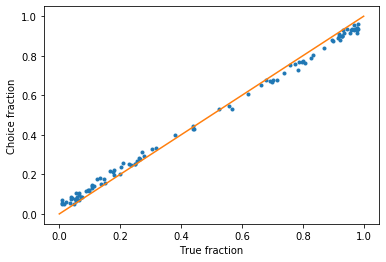

In [274]:
plt.plot(income_fracs, choice_fracs, '.')
plt.plot([0, 1], [0, 1])
plt.xlabel('Income fraction')
plt.ylabel('Choice fraction')

## Simulate a world which switches between two states

In [333]:
# Build the rates object
prew = 0.8
pswitch = 0.05
nblocks = 20
ntrialsperblock = 50
rates = []
for i in range(nblocks):
    if i % 2:
        rates.append([0.1, 0.9])
    else:
        rates.append([0.9, 0.1])

rates = np.array(rates)
ntrials = np.random.uniform(low=200, high=300, size=nblocks).astype('int')
world = PersistentWorld(rates=rates, ntrials=ntrials)

agent = InferenceBasedAgent(prew=prew, pswitch=pswitch, type='random')

exp = Experiment(agent, world)
res = exp.run()

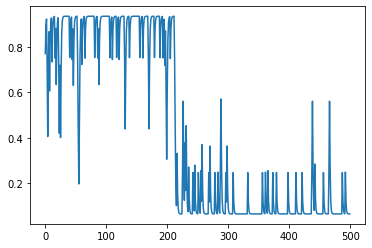

In [334]:
plt.plot(agent.p0_history[:500])

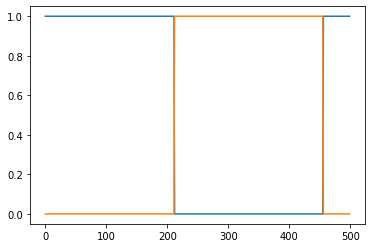

In [301]:
side_history = np.array(world.side_history)
plt.plot(world.side_history[:500])